<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience1/blob/main/8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overfitting - Regularization in Regression

In [96]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score

import warnings

In [97]:
# plotting setup
plt.figure(figsize=(10,5), dpi=150)
plt.style.use("Solarize_Light2")
np.random.seed(42)
np.set_printoptions(precision=2, linewidth=50)

<Figure size 1500x750 with 0 Axes>

In [98]:
# Generate data
def f(x):
  return 0.2 + np.cos(8 * (x - 1))

def generate_data(n_samples=100):
  x = np.sort(np.random.rand(n_samples)) # 0.1, 0.2, 0.4, 0.03, 0.12,
  y = f(x) + 0.3 * np.random.randn(n_samples)
  return x, y

<ipython-input-99-726dfa853a81>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, s=50, edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)


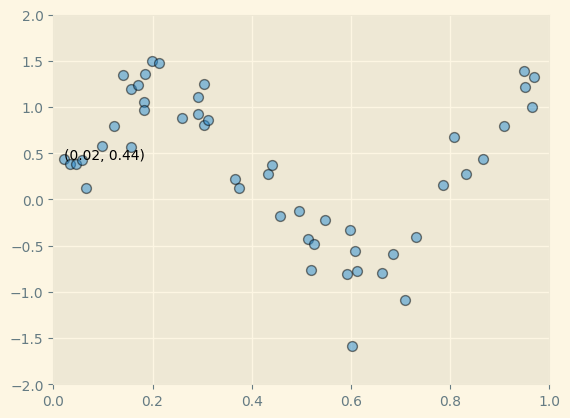

In [99]:
n_samples = 50 # number of data samples
x, y = generate_data(n_samples)

# plot data
plt.figure()
plt.scatter(x, y, s=50, edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)
plt.text(x[0], y[0], "(" + str(np.round(x[0], 2)) + ", " + str(np.round(y[0], 2)) + ")")
plt.xlim(0, 1)
plt.ylim(-2, 2)
plt.show()

# Polynomial Regression

In [100]:
from sklearn.preprocessing import PolynomialFeatures
def fit_poly(x, y, deg=1):
  # add polynomial features
  polynomial_features = PolynomialFeatures(degree=deg)
  # create and fit model
  linear_regression = LinearRegression()
  model = Pipeline([("poly_feat", polynomial_features), ("lin_reg", linear_regression)])
  model.fit(x[:, None], y)
  return model

In [101]:
degrees = [1, 3, 5, 7, 10, 20]

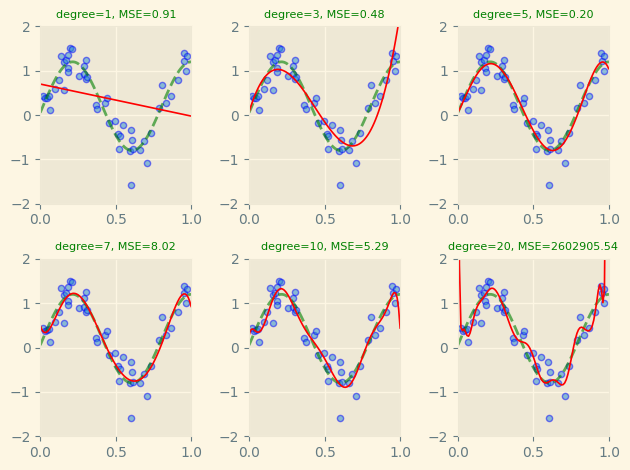

In [89]:
plt.figure()
for d in degrees:
  model = fit_poly(x, y, deg=d)
  scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

  # plot data and model
  plt.subplot(2, 3, degrees.index(d) + 1)
  plt.tight_layout()

  x_test = np.linspace(0, 1, 100)
  plt.plot(x_test, f(x_test), 'g--', label="Target", alpha=0.6)
  plt.scatter(x, y, s=20, edgecolor='b', alpha=0.5, label="Samples")
  plt.plot(x_test, model.predict(x_test[:, None]), 'r', lw=1.2, label="Predicted")
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.title("degree={}, MSE={:.2f}".format(d, -scores.mean()), fontsize=8, color="green")

plt.show()

In [90]:
def plot_coef(weight):
  plt.figure()
  plt.bar(np.arange(1, len(weight)+1), height=np.abs(weight), color='g')
  plt.show()

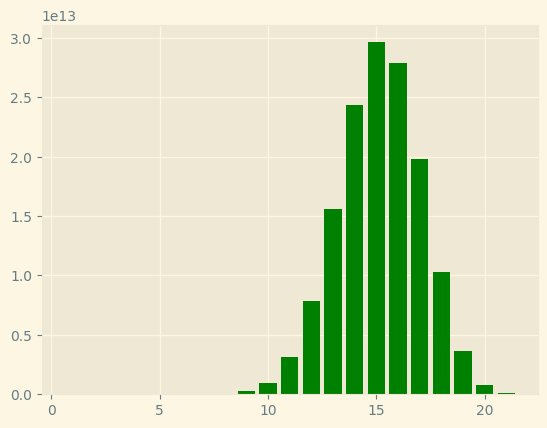

In [91]:
plot_coef(model.steps[1][1].coef_)

# L2-Regularization (Ridge)

In [92]:
def fit_poly_L2_reg(degree=1, lmbda=1.0):
  # add polynomial features
  polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
  # create and fit the model
  L2_regression = Ridge(alpha=lmbda)
  model = Pipeline([("polynomial_features", polynomial_features), ("L2_regression", L2_regression)])
  model.fit(x[:, None], y)
  return model

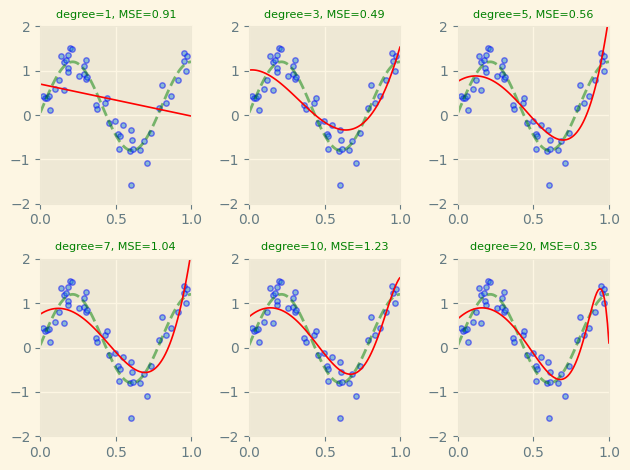

In [93]:
lmbda = 0.01
plt.figure()
for d in degrees:
  model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
  scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

  # plot data and model
  plt.subplot(2, 3, degrees.index(d) + 1)
  plt.tight_layout()

  x_test = np.linspace(0, 1, 100)
  plt.plot(x_test, f(x_test), 'g--', label="Target", alpha=0.5)
  plt.scatter(x, y, s=15, edgecolor='b', alpha=0.5, label="Samples")
  plt.plot(x_test, model.predict(x_test[:, None]), 'r', lw=1.2, label="Predicted")
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.title("degree={}, MSE={:.2f}".format(d, -scores.mean()), fontsize=8, color="green")

plt.show()

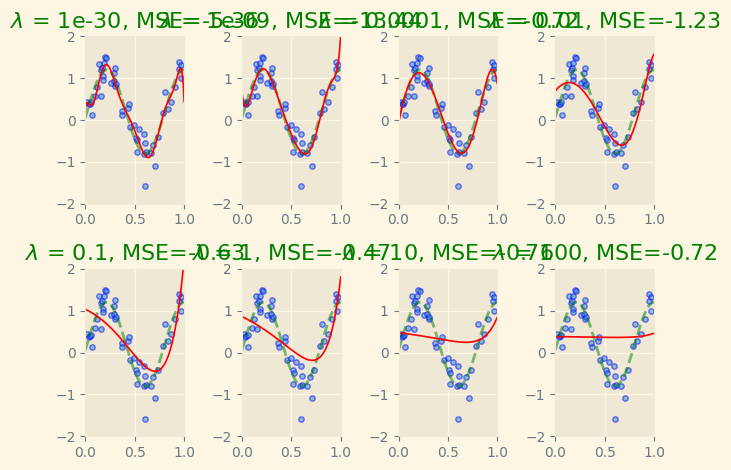

In [94]:
# The effect of lambda analysis for L2
lmbdas = [1e-30, 1e-9, 1e-4, 1e-2, 1e-1, 1, 10, 100]
plt.figure()
d = 10
for lmbda in lmbdas:
  model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
  scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

  # plot data and model
  plt.subplot(2, 4, lmbdas.index(lmbda)+1)
  plt.tight_layout()
  x_test = np.linspace(0, 1, 100)
  plt.plot(x_test, f(x_test), 'g--', label="Target", alpha=0.5)
  plt.scatter(x, y, s=15, edgecolor='b', alpha=0.5, label="Samples")
  plt.plot(x_test, model.predict(x_test[:, None]), 'r', lw=1.2, label="Predicted")
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.title("$\lambda$ = {}, MSE={:.2f}".format(lmbda, scores.mean()), color="green")

plt.show()

Text(0.5, 1.0, 'degree = 20, $\\lambda$ = 0.0001, Loss (MSE) = 6.32')

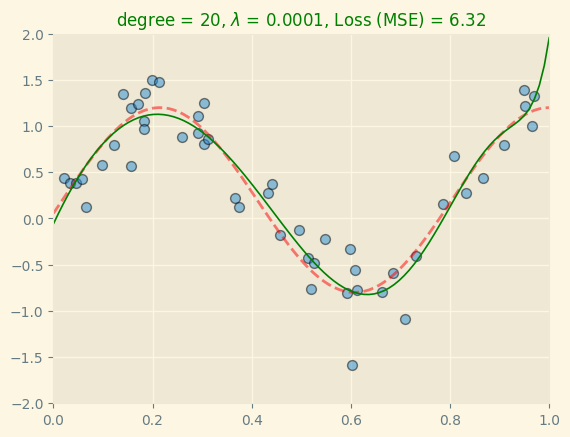

In [95]:
d = 20
lmbda = 1e-4 #0.0001

# fir
model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

# plot
fig, ax = plt.subplots(1)

x_test = np.linspace(0, 1, 100)
ax.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
ax.scatter(x, y, s=50, edgecolor='k', alpha=0.5, label="Samples")
ax.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
ax.set_xlim((0, 1))
ax.set_ylim((-2, 2))
ax.set_title("degree = %d, $\lambda$ = %s, Loss (MSE) = %.2f" % (d, lmbda, -scores.mean()), fontsize=12, color="green")

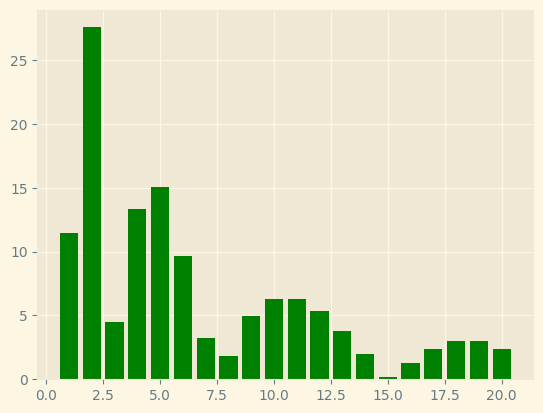

In [102]:
plot_coef(model.steps[1][1].coef_)

# L1-Regularization (Lasso)